# 와인 분류기 만들기 




  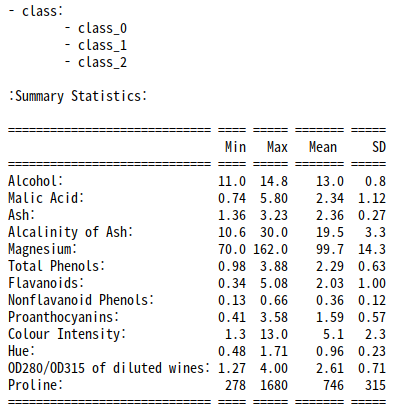

+ 와인데이터 데이터 셋 

    + 총데이터 :173개 
    + feature 수 : 13개 
    + 정답값 이름: 'class_0', 'class_1', 'class_2'
    
    
    
  

## (1) 필요한 모듈 import하기 

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비하기 

In [2]:
# 와인데이터에 무엇이 있나 확인해보자 
wine_data = load_wine()
print(wine_data.keys())
data = wine_data.data
label = wine_data.target
wine_data.target_names
wine_data.feature_names
print(wine_data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

## (3)데이터 이해하기 

In [3]:
import pandas as pd
alldata = pd.DataFrame(data=data,columns=wine_data.feature_names)
alldata



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
alldata['label'] = wine_data.target
alldata

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
print(data.shape)
print(label.shape)

(178, 13)
(178,)


# (4) train,test 데이터 분리

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, label, random_state=42, test_size=0.2)

# (5) 다양한 모델로 학습시켜보기 
## 1번 Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



## 2번 랜덤포레스트 

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 3번 SVM

In [8]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



## 4번 SGD classfication

In [9]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.86      0.43      0.57        14
           2       0.41      0.88      0.56         8

    accuracy                           0.69        36
   macro avg       0.76      0.72      0.68        36
weighted avg       0.81      0.69      0.71        36



## 5번 Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/home/ssac11/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (6) 모델 평가 

와인 분류기에서는 랜덤포레스트 모델이 precision과 recall이 모두 1이 나왔다.   
머신러닝 분류문제에서는 랜덤포레스트가 가장 무난하게 학습된다고 배웠는데   
이번에 각각의 모델을 돌리면서 성능지표 및 성능이 모두 다르다는 것을 깨달았다.  
아직 그 안에 작동원리는 세세하게 모르지만 어떤 모델이 나의 데이터와 잘 맞을지 모르니 많은 모델을 돌릴 수 있다면   
돌려보는게 맞다는 생각이 든다.   
